In [1]:
# Exercise 8: Classify Setosa and not Setosa with SVM. Make Linear and SVC roughly same
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
# Scale Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [2]:
# Exercise 10: Carlifornia Housing
housing_df = pd.read_csv("/home/long/Desktop/dev/learning/hands_on_ml/chapter_5/california-housing-prices/housing.csv")
city_lat_long_df = pd.read_csv("/home/long/Desktop/dev/learning/hands_on_ml/chapter_5/california-housing-prices/cal_cities_lat_long.csv")

In [3]:
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
city_lat_long_df.head()

Name   Latitude   Longitude
0      Adelanto  34.582769 -117.409214
1  Agoura Hills  34.153339 -118.761675
2       Alameda  37.765206 -122.241636
3        Albany  37.886869 -122.297747
4      Alhambra  34.095286 -118.127014

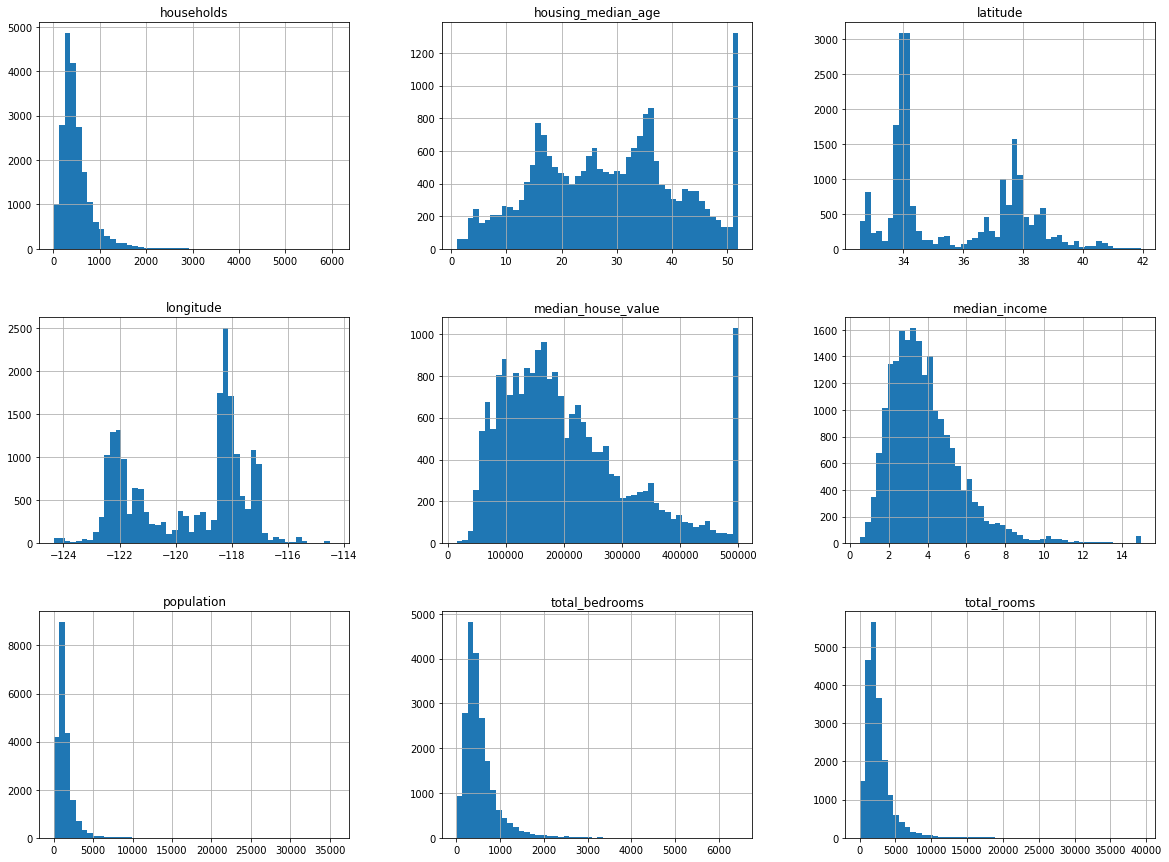

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

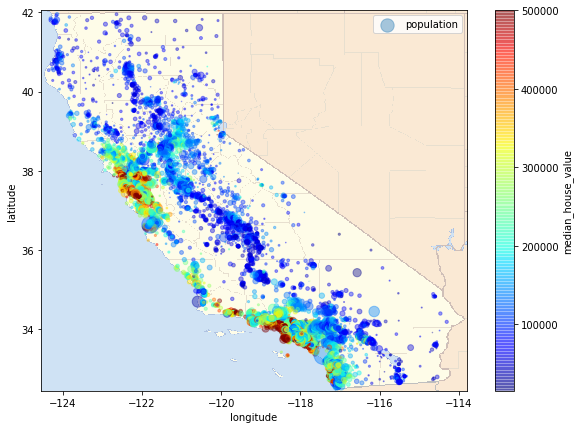

In [6]:
california_img = plt.imread("/home/long/Desktop/dev/learning/hands_on_ml/chapter_5/california-housing-prices/california.png")
fig , ax= plt.subplots()
ax.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
housing_df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    s=housing_df["population"]/100,
    label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    ax=ax
)
plt.legend()

In [7]:
# Convert categories into numbers
housing_df["ocean_proximity"].head(10)


0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [8]:
import math
import numpy as np
def get_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

def find_closest_city_distance(location, city_loc_df):
    city_loc_df["distance_from_loc"] = city_loc_df.apply(lambda x: get_distance(location, (x["city_lat"], x["city_long"])), axis=1)
    min_index = city_loc_df["distance_from_loc"].idxmin()
    closest_city_row = city_loc_df.iloc[min_index, :]
    return pd.Series([closest_city_row["city_name"], closest_city_row["distance_from_loc"]])

def filter_closest_city(house_loc_df, city_loc_df):
    result_df = house_loc_df.copy()
    result_df[["closest_city", "city_distance"]] = house_loc_df.apply(
        lambda x: find_closest_city_distance((x["latitude"], x["longitude"]), city_loc_df), axis=1
    )
    return result_df

In [9]:
city_lat_long_df.rename(columns={"Name":"city_name", "Latitude":"city_lat", "Longitude":"city_long"}, inplace=True)

In [10]:
closest_housing_df = pd.read_csv("/home/long/Desktop/dev/learning/hands_on_ml/chapter_5/california-housing-prices/california_processed_city_distance.csv", index_col=0)

In [11]:
# Splitting using scikit learn
from sklearn.model_selection import train_test_split
X_columns = [column for column in closest_housing_df.columns if column != "median_house_value"]
train_X, test_X, train_y, test_y = train_test_split(closest_housing_df[X_columns], closest_housing_df["median_house_value"], test_size=0.2, random_state=1)
print(closest_housing_df.shape[0], "train", "+", test_X.shape[0], "test")

16512 train + 3303 test


In [12]:
train_X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10626    -117.77     33.71                13.0       1939.0           247.0   
8078     -118.20     33.82                21.0       2251.0           452.0   
10469    -117.72     33.53                14.0       1672.0           295.0   
1250     -122.05     39.34                44.0       1064.0           230.0   
7720     -118.11     33.94                37.0       1434.0           262.0   

       population  households  median_income ocean_proximity   closest_city  \
10626       928.0       244.0         8.1111       <1H OCEAN         Irvine   
8078        913.0       420.0         4.6042      NEAR OCEAN    Signal Hill   
10469       704.0       293.0         5.1129       <1H OCEAN  Laguna Niguel   
1250        494.0       175.0         2.8750          INLAND         Colusa   
7720        786.0       256.0         4.4375       <1H OCEAN         Downey   

       city_distance  
10626       3.689353  
8078        3.436521  
10469       1.421999  
1250       14.403540  
7720        2.081987

In [13]:
train_y.head()

10626    379800.0
8078     272200.0
10469    251300.0
1250      61500.0
7720     244900.0
Name: median_house_value, dtype: float64

In [14]:
# Transform data
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        # drop previous attributes
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]  
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [16]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
class MyOneHotEncoder(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = OneHotEncoder(*args, **kwargs)
        return None

    def fit(self, x, y=None):
        self.encoder.fit(x)
        self.categories = self.encoder.categories_
        return self
    
    def transform(self, x, y=None):
        return self.encoder.transform(x.reshape(-1, 1))
    
    
    def fit_transform(self, x, y=None):
#         import pdb; pdb.set_trace()
        self.fit(x.reshape(-1, 1))
        return self.transform(x)
    
class MyLabelEncoder(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelEncoder(*args, **kwargs)
        return None

    def fit(self, x, y=None):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=None):
        return self.encoder.transform(x).reshape(-1, 1)
    
    
    def fit_transform(self, x, y=None):
#         import pdb; pdb.set_trace()
        self.fit(x)
        return self.transform(x)

In [17]:
# Transformation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
num_attribs = ['latitude', 'longitude', 'city_distance', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income']

cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    # ('attribs_remover', AttributeRemover(num_attribs, delete_indices=[3,4,5,6])),
    ('std_scaler', StandardScaler())
])
cat_pipeline_0 = Pipeline([
    ("selector", DataFrameSelector(cat_attribs[0])),
    ("cat_encoder", MyOneHotEncoder(sparse=False))
])

# cat_pipeline_1 = Pipeline([
#     ("selector", DataFrameSelector(cat_attribs[1])),
#     ("cat_encoder", MyOneHotEncoder())
# ])

In [18]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline_0", cat_pipeline_0),
#     ("cat_pipeline_1", cat_pipeline_1)
])

In [19]:
proc_train_X = full_pipeline.fit_transform(train_X)
proc_test_X = full_pipeline.transform(test_X)

In [20]:
train_X.shape

(13209, 11)

In [21]:
proc_train_X.shape

(13209, 17)

In [22]:
# Parameter search
linear_grid = [
    {"C": [1, 1000, 100000], "epsilon":[0.1, 1, 10], "dual":[False], "loss":["squared_epsilon_insensitive"]},
]

In [23]:
import numpy as np
test_fold = np.random.choice([-1, 0], size=proc_train_X.shape[0], p=[0.9, 0.1])

In [24]:
from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
linear_grid_cv = GridSearchCV(
    LinearSVR(), 
    linear_grid, 
    scoring="neg_root_mean_squared_error",
    cv=ps,
    verbose=5
)

In [26]:
linear_grid_cv.fit(proc_train_X, train_y)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV] C=1, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive ..
[CV]  C=1, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, score=-68684.267, total=   0.1s
[CV] C=1, dual=False, epsilon=1, loss=squared_epsilon_insensitive ....
[CV]  C=1, dual=False, epsilon=1, loss=squared_epsilon_insensitive, score=-68684.275, total=   0.1s
[CV] C=1, dual=False, epsilon=10, loss=squared_epsilon_insensitive ...
[CV]  C=1, dual=False, epsilon=10, loss=squared_epsilon_insensitive, score=-68684.324, total=   0.0s
[CV] C=1000, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s



[CV]  C=1000, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, score=-68684.200, total=   0.1s
[CV] C=1000, dual=False, epsilon=1, loss=squared_epsilon_insensitive .
[CV]  C=1000, dual=False, epsilon=1, loss=squared_epsilon_insensitive, score=-68684.172, total=   0.0s
[CV] C=1000, dual=False, epsilon=10, loss=squared_epsilon_insensitive 
[CV]  C=1000, dual=False, epsilon=10, loss=squared_epsilon_insensitive, score=-68684.241, total=   0.0s
[CV] C=100000, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive 
[CV]  C=100000, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, score=-68684.186, total=   0.0s
[CV] C=100000, dual=False, epsilon=1, loss=squared_epsilon_insensitive 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  C=100000, dual=False, epsilon=1, loss=squared_epsilon_insensitive, score=-68684.215, total=   0.1s
[CV] C=100000, dual=False, epsilon=10, loss=squared_epsilon_insensitive 
[CV]  C=100000, dual=False, epsilon=10, loss=squared_epsilon_insensitive, score=-68684.241, total=   0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1000, 100000], 'dual': [False],
                          'epsilon': [0.1, 1, 10],
                          'loss': ['squared_epsilon_insensitive']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=5)

In [27]:
from sklearn.metrics import mean_squared_error
pred_reg_train = linear_grid_cv.predict(proc_train_X)
mean_squared_error(train_y, pred_reg_train, squared=False)

68149.29675090556

In [28]:
pred_reg_test = linear_grid_cv.predict(proc_test_X)
mean_squared_error(test_y, pred_reg_test, squared=False)

67453.29394662174

In [45]:
class ScaleRegSeries(TransformerMixin):
    def __init__(self, *args, **kwargs):
        return None

    def fit(self, y):
        self.mean = y.mean()
        self.std = y.std()
        return self
    
    def transform(self, y):
        return (y - self.mean)/ self.std
    
    def reverse_transform(self, y):
        return (y * self.std) + self.mean
    
    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)

In [46]:
# Feature Scaling label
proc_train_X = full_pipeline.fit_transform(train_X)
proc_test_X = full_pipeline.transform(test_X)
reg_label_scaler = ScaleRegSeries()
proc_train_y = reg_label_scaler.fit_transform(train_y)
proc_test_y = reg_label_scaler.fit_transform(test_y)

In [54]:
# Parameter search
param_grid = [
    {"C": [1, 10, 1000], "epsilon":[0.1, 1, 10], "kernel":["rbf"],"max_iter":[50000]},
    {"C": [1, 10, 1000], "kernel":["linear"], "max_iter":[50000]},
    {"C": [1, 10, 1000], "degree":[3, 10, 100], "kernel":["poly"], "max_iter":[50000]}
]

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_cv = GridSearchCV(
    SVR(), 
    param_grid, 
    scoring="neg_root_mean_squared_error",
    cv=ps,
    verbose=5,
    n_jobs=4
)

In [56]:
grid_cv.fit(proc_train_X, proc_train_y)

Fitting 1 folds for each of 21 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   51.3s
[Parallel(n_jobs=4)]: Done  14 out of  21 | elapsed:   59.9s remaining:   30.0s
[Parallel(n_jobs=4)]: Done  19 out of  21 | elapsed:  1.2min remaining:    7.3s
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:  1.3min finished
/home/long/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/home/long/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [1, 10, 1000], 'epsilon': [0.1, 1, 10],
                          'kernel': ['rbf'], 'max_iter': [50000]},
                         {'C': [1, 10, 1000], 'kernel': ['linear'],
                          'max_iter': [50000]},
                         {'C': [1, 10, 1000], 'degree': [3, 10, 100],
                          'kernel': ['poly'], 'max_iter': [50000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=5)

In [57]:
pred_reg_train = reg_label_scaler.reverse_transform(grid_cv.predict(proc_train_X))
mean_squared_error(train_y, pred_reg_train, squared=False)

48951.55999155998

In [58]:
pred_reg_test = reg_label_scaler.reverse_transform(grid_cv.predict(proc_test_X))
mean_squared_error(test_y, pred_reg_test, squared=False)

52917.22031003034

In [59]:
grid_cv.best_estimator_.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 50000,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [60]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(proc_train_X, proc_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
pred_reg_train = reg_label_scaler.reverse_transform(linear_reg.predict(proc_train_X))
mean_squared_error(train_y, pred_reg_train, squared=False)

68162.21462923508

In [62]:
pred_reg_test = reg_label_scaler.reverse_transform(linear_reg.predict(proc_test_X))
mean_squared_error(test_y, pred_reg_test, squared=False)

67440.29891429248